In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib notebook

# Centre Voltage Sweep

In [61]:
cen_v= pd.read_csv('./2019-06-29/test_daedalus_voltCenter_calib_2019-06-29_4.csv', comment="#")

In [69]:
cen_v[abs(cen_v.Yfield-0.1)<0.01]

,V,Xfield,Yfield,Zfield,elapsed_time
80,-1.776428,0.000078,0.107459,-0.000256,42.002402
81,-1.680908,0.000065,0.102241,-0.000233,42.441427
82,-1.577759,0.000064,0.096910,-0.000217,42.883453
83,-1.477356,0.000081,0.091587,-0.000203,43.327478
318,-1.477966,0.000125,0.090168,-0.000231,161.404232
319,-1.577454,0.000134,0.095476,-0.000240,161.973264
320,-1.677856,0.000096,0.100753,-0.000246,162.532296
321,-1.777039,0.000105,0.106006,-0.000237,163.096328


In [63]:
cen_vp = cen_v[cen_v.Yfield>0]
cen_vn = cen_v[cen_v.Yfield<0]

In [65]:
cen_vp_coeff = np.polyfit(cen_vp.Yfield.values, cen_vp.V.values, 12)
cen_vn_coeff = np.polyfit(cen_vn.Yfield.values, cen_vn.V.values, 12)
cen_v_coeffs = np.asarray([cen_vp_coeff, cen_vn_coeff])
print(cen_v_coeffs)

[[ 7.05305641e+09 -1.51271185e+10  1.41647656e+10 -7.59806511e+09
   2.57528894e+09 -5.74237797e+08  8.51906042e+07 -8.34240737e+06
   5.25318472e+05 -2.02450386e+04  4.36540118e+02 -2.30791939e+01
   2.34583811e-01]
 [-6.49407521e+10 -1.24727127e+11 -1.05064787e+11 -5.09825192e+10
  -1.57384357e+10 -3.22130253e+09 -4.42112397e+08 -4.02735376e+07
  -2.35974321e+06 -8.38696419e+04 -1.63107464e+03 -3.29361657e+01
   1.82197039e-01]]


In [6]:
np.savetxt("./icarusCalibCsv/icarus_volt_center_calib.csv", cen_v_coeffs, delimiter=",")

In [66]:
cen_vp_fit = np.poly1d(cen_vp_coeff)
cen_vn_fit = np.poly1d(cen_vn_coeff)

In [67]:
cen_vp_fit(0.1)

-1.6512923547440148

Text(0.5, 1.0, 'B(V)')

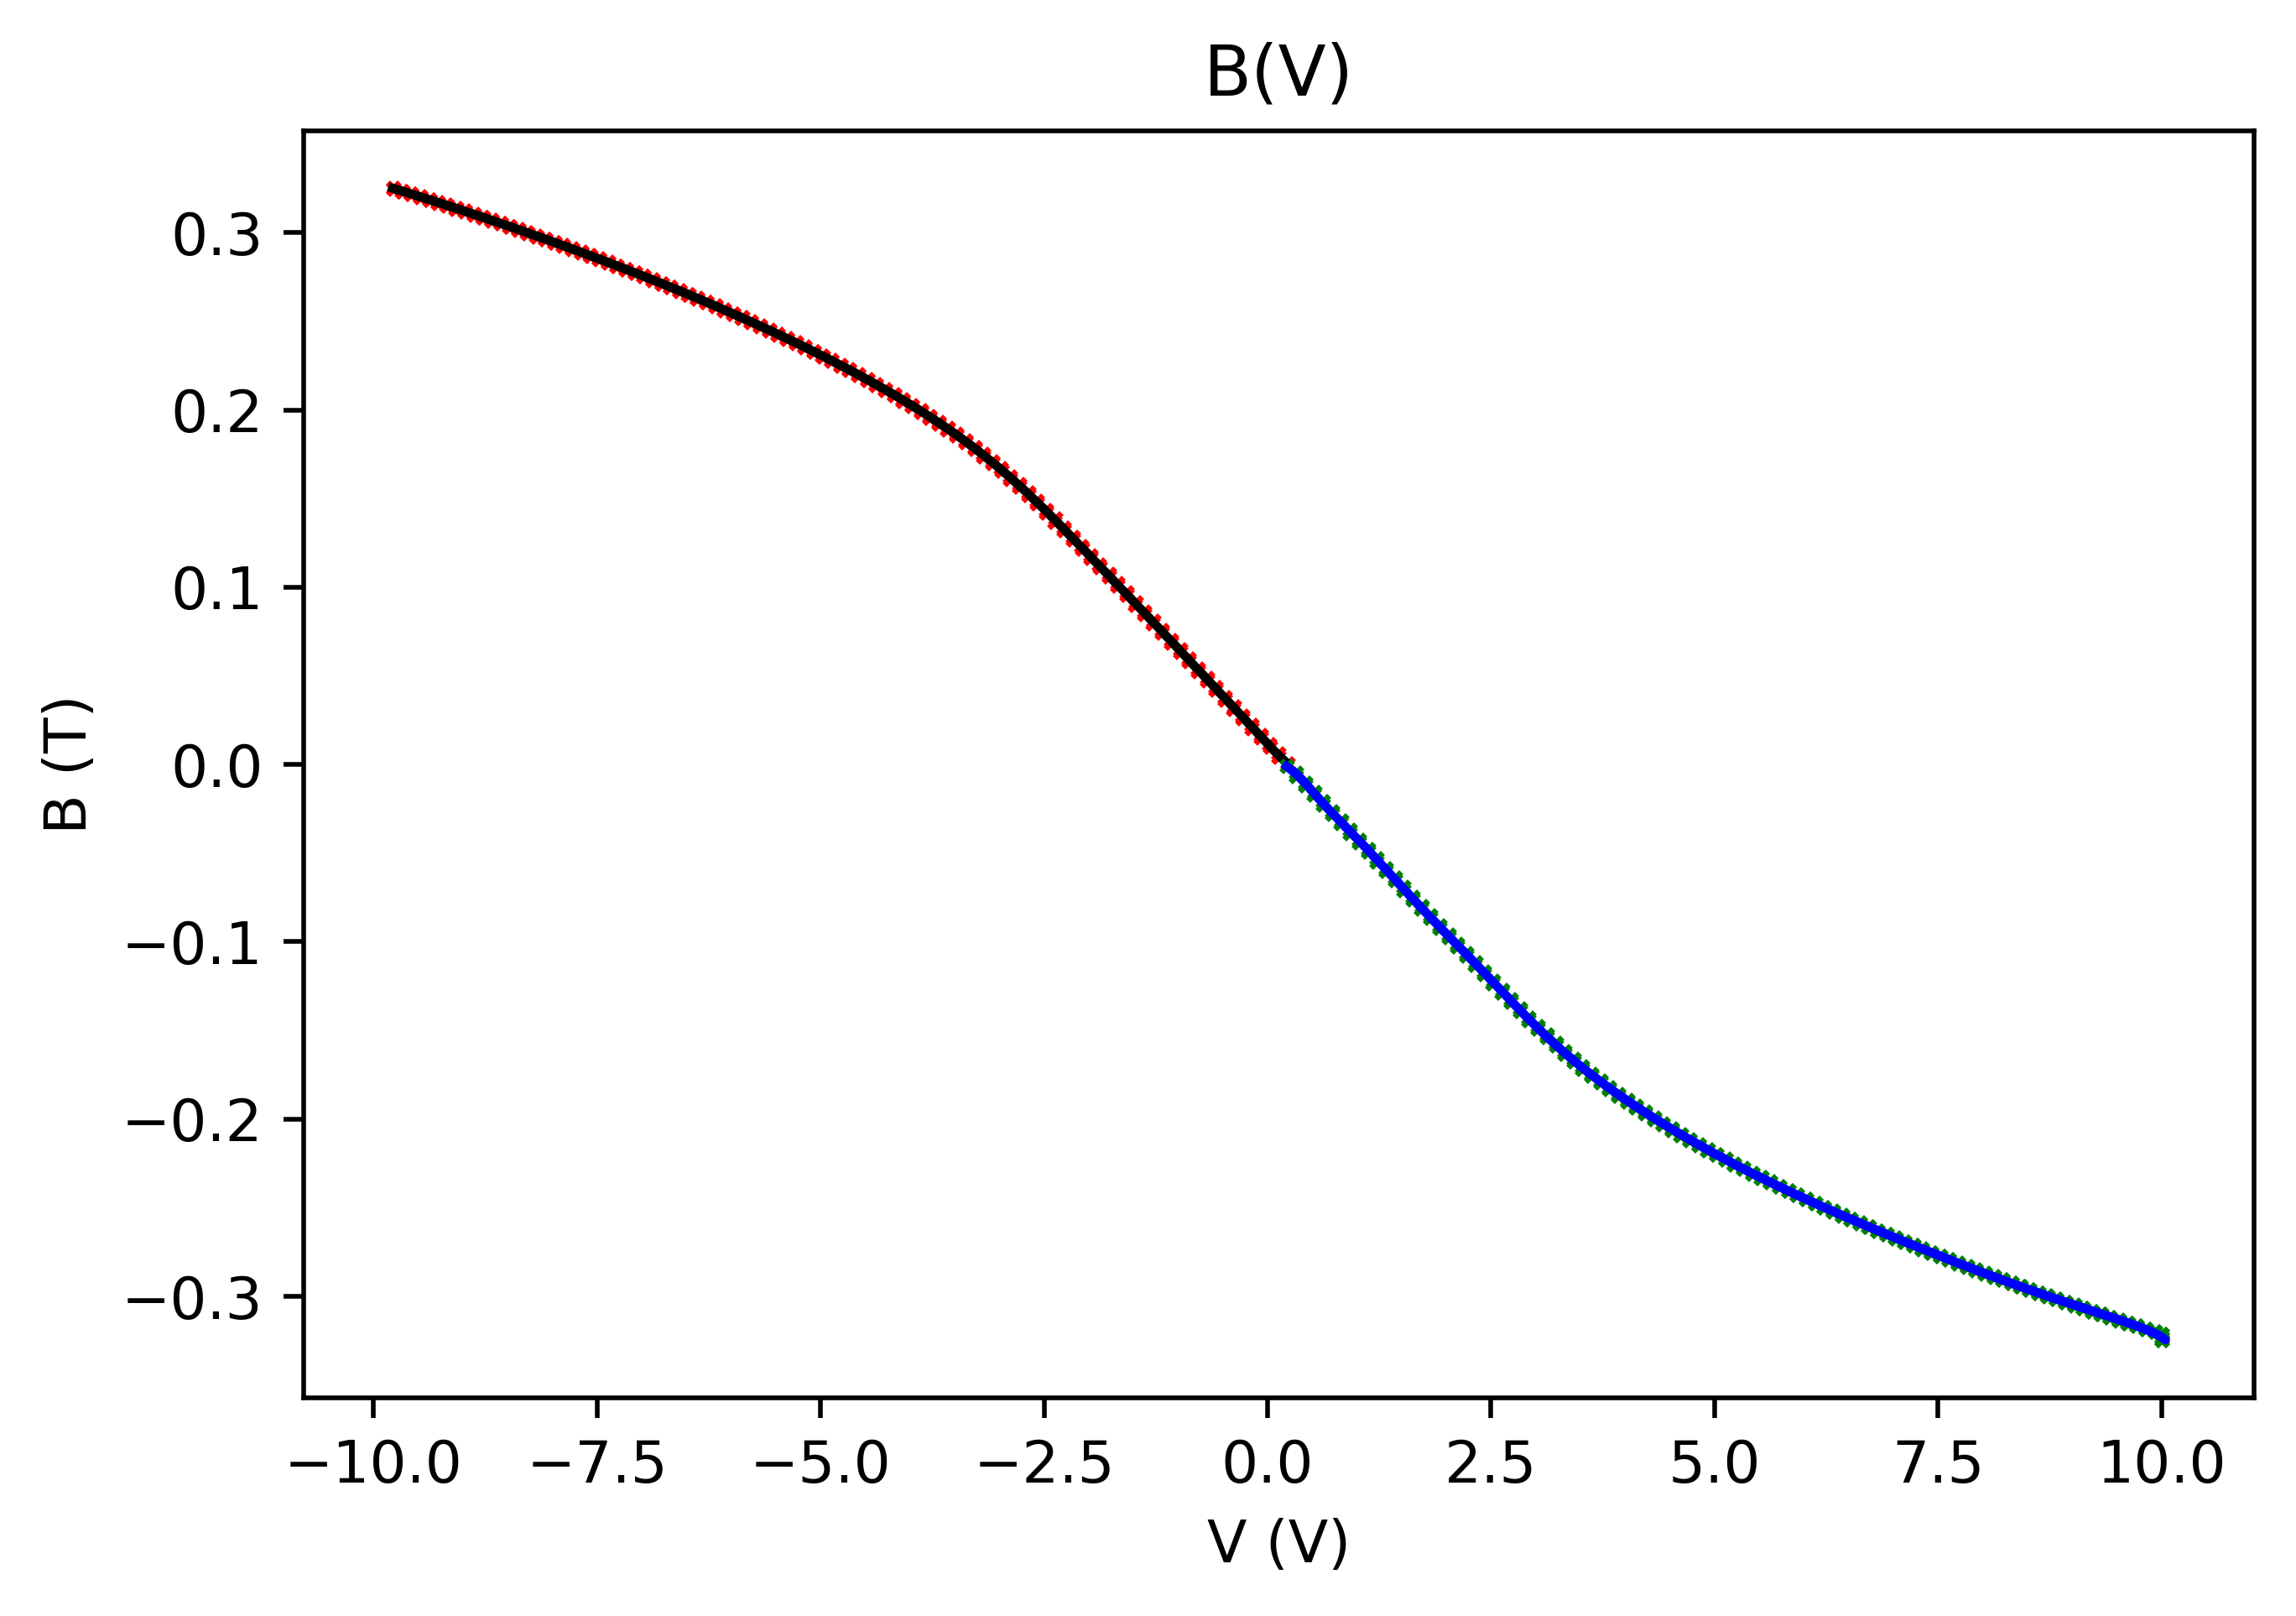

In [68]:
plt.figure(dpi=500)

plt.plot(cen_vp.V, cen_vp.Yfield, 'rx', markersize=2)
plt.plot(cen_vp_fit(cen_vp.Yfield), cen_vp.Yfield , 'k')

plt.plot(cen_vn.V, cen_vn.Yfield, 'gx', markersize=2)
plt.plot(cen_vn_fit(cen_vn.Yfield), cen_vn.Yfield , 'b')
plt.xlabel('V (V)')
plt.ylabel('B (T)')
plt.title('B(V)')

# Radial Calibration 5 V

In [34]:
vp = pd.read_csv('./2019-06-29/test_daedalus_radialPolar_calib_A000.0_2019-06-29_6.csv', comment='#')
vn = pd.read_csv('./2019-06-29/test_daedalus_radialPolar_calib_A000.0_2019-06-29_7.csv', comment='#')

In [35]:
vp = vp.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vp = vp.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Yfield)*180/np.pi)
vp = vp.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

vn = vn.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vn = vn.assign(theta=lambda a: np.arctan2(a.Zfield, a.Yfield)*180/np.pi)
vn = vn.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

In [36]:
vp_dv = {}
vn_dv = {}
for c in vp.columns[:]:
    vp_dv[c] = (["R"],vp[c])
    vn_dv[c] = (["R"],vn[c])
vp_ds = xr.Dataset(vp_dv)
vn_ds = xr.Dataset(vn_dv)

### OOP field

In [37]:
vp_ds.where(abs(vp_ds.theta) == abs(vp_ds.theta).min(), drop=True)

<xarray.Dataset>
Dimensions:       (R: 1)
Coordinates:
  * R             (R) float64 0.01
Data variables:
    Xfield        (R) float64 -0.0001822
    Yfield        (R) float64 -0.2248
    Zfield        (R) float64 5.171e-05
    elapsed_time  (R) float64 1.25e+03
    phi           (R) float64 -180.0
    theta         (R) float64 0.01318
    Bmag          (R) float64 0.2248

In [38]:
vp_ds.where(abs(vn_ds.theta-90.0) == abs(vn_ds.theta-90.0).min(), drop=True)

<xarray.Dataset>
Dimensions:       (R: 1)
Coordinates:
  * R             (R) float64 14.43
Data variables:
    Xfield        (R) float64 -0.005237
    Yfield        (R) float64 4.936e-05
    Zfield        (R) float64 -0.1368
    elapsed_time  (R) float64 2.392e+03
    phi           (R) float64 -89.46
    theta         (R) float64 -90.02
    Bmag          (R) float64 0.1368

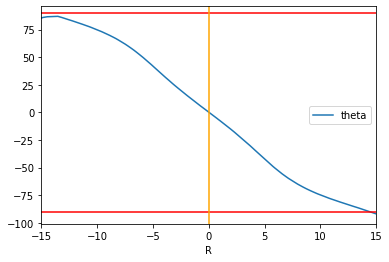

In [39]:
vp.plot('R', 'theta')
plt.axhline(90,color='r')
plt.axhline(-90,color='r')
plt.axvline(0,color='orange')

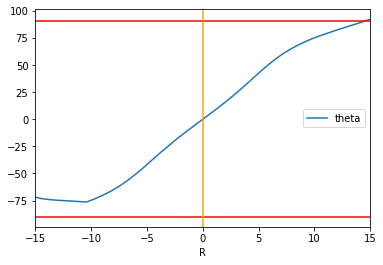

In [40]:
vn.plot('R', 'theta')
plt.axhline(-90,color='r')
plt.axhline(90, color='r')
plt.axvline(0,color='orange')

In [58]:
import numpy as np

print(np.arctan2(0.13, 0.006))

1.5246752107803854


In [41]:
vp_rp = vp[vp.R>0]
vp_rn = vp[vp.R<0]
vn_rp = vn[vn.R>0]
vn_rn = vn[vn.R<0]

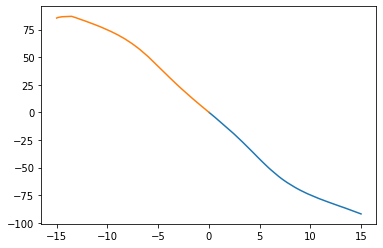

In [42]:
plt.plot(vp_rp.R, vp_rp.theta)
plt.plot(vp_rn.R, vp_rn.theta)

### Positive and Negative field discrepancy is <0.5$^\circ$ 

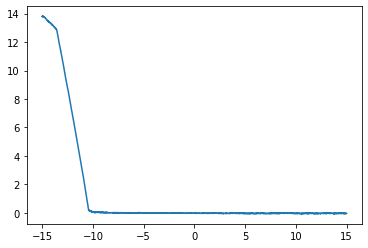

In [43]:
plt.plot(vp.R, (vp.theta+vn.theta))

### Positive voltage R-theta relation

In [44]:
vp_R_thetapos_coeff = np.polyfit(vp_rp.theta, vp_rp.R, 6)
vp_R_thetaneg_coeff = np.polyfit(vp_rn.theta, vp_rn.R, 6)
vp_R_thetapos = np.poly1d(vp_R_thetapos_coeff)
vp_R_thetaneg = np.poly1d(vp_R_thetaneg_coeff)
R_theta = vp_R_thetapos_coeff,vp_R_thetaneg_coeff
print(R_theta)
np.savetxt("./icarusCalibCsv/icarus_radial_polar_calib.csv", R_theta, delimiter=",")

(array([-1.88875574e-10, -4.69977166e-08, -4.12744260e-06, -1.69582896e-04,
       -3.68481506e-03, -1.59453031e-01, -3.74949995e-02]), array([-2.00043896e-10,  4.72499202e-08, -4.47312714e-06,  1.97086483e-04,
       -3.61658550e-03, -1.03509122e-01, -3.55658911e-02]))


<Figure size 432x288 with 0 Axes>

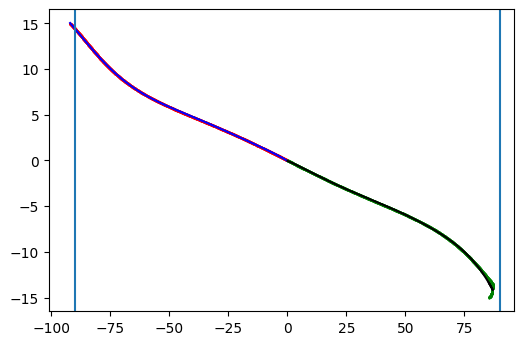

In [45]:
plt.figure(1)
plt.figure(dpi=100)
plt.plot(vp_rp.theta, vp_rp.R, 'r+', markersize=2)
plt.plot(vp_rp.theta, vp_R_thetapos(vp_rp.theta), 'b')
plt.plot(vp_rn.theta, vp_rn.R, 'g+', markersize=2)
plt.plot(vp_rn.theta, vp_R_thetaneg(vp_rn.theta), 'k')
plt.axvline(90)
plt.axvline(-90)

In [46]:
bmag_vp_rp_coeff = np.polyfit(vp[vp.R>0].R, vp[vp.R>0].Bmag, 10)
bmag_vp_rp = np.poly1d(bmag_vp_rp_coeff)

bmag_vp_rn_coeff = np.polyfit(vp[vp.R<0].R, vp[vp.R<0].Bmag, 10)
bmag_vp_rn = np.poly1d(bmag_vp_rn_coeff)

bmag_vn_rp_coeff = np.polyfit(vn[vn.R>0].R, vn[vn.R>0].Bmag, 10)
bmag_vn_rp = np.poly1d(bmag_vn_rp_coeff)

bmag_vn_rn_coeff = np.polyfit(vn[vn.R<0].R, vn[vn.R<0].Bmag, 10)
bmag_vn_rn = np.poly1d(bmag_vn_rn_coeff)

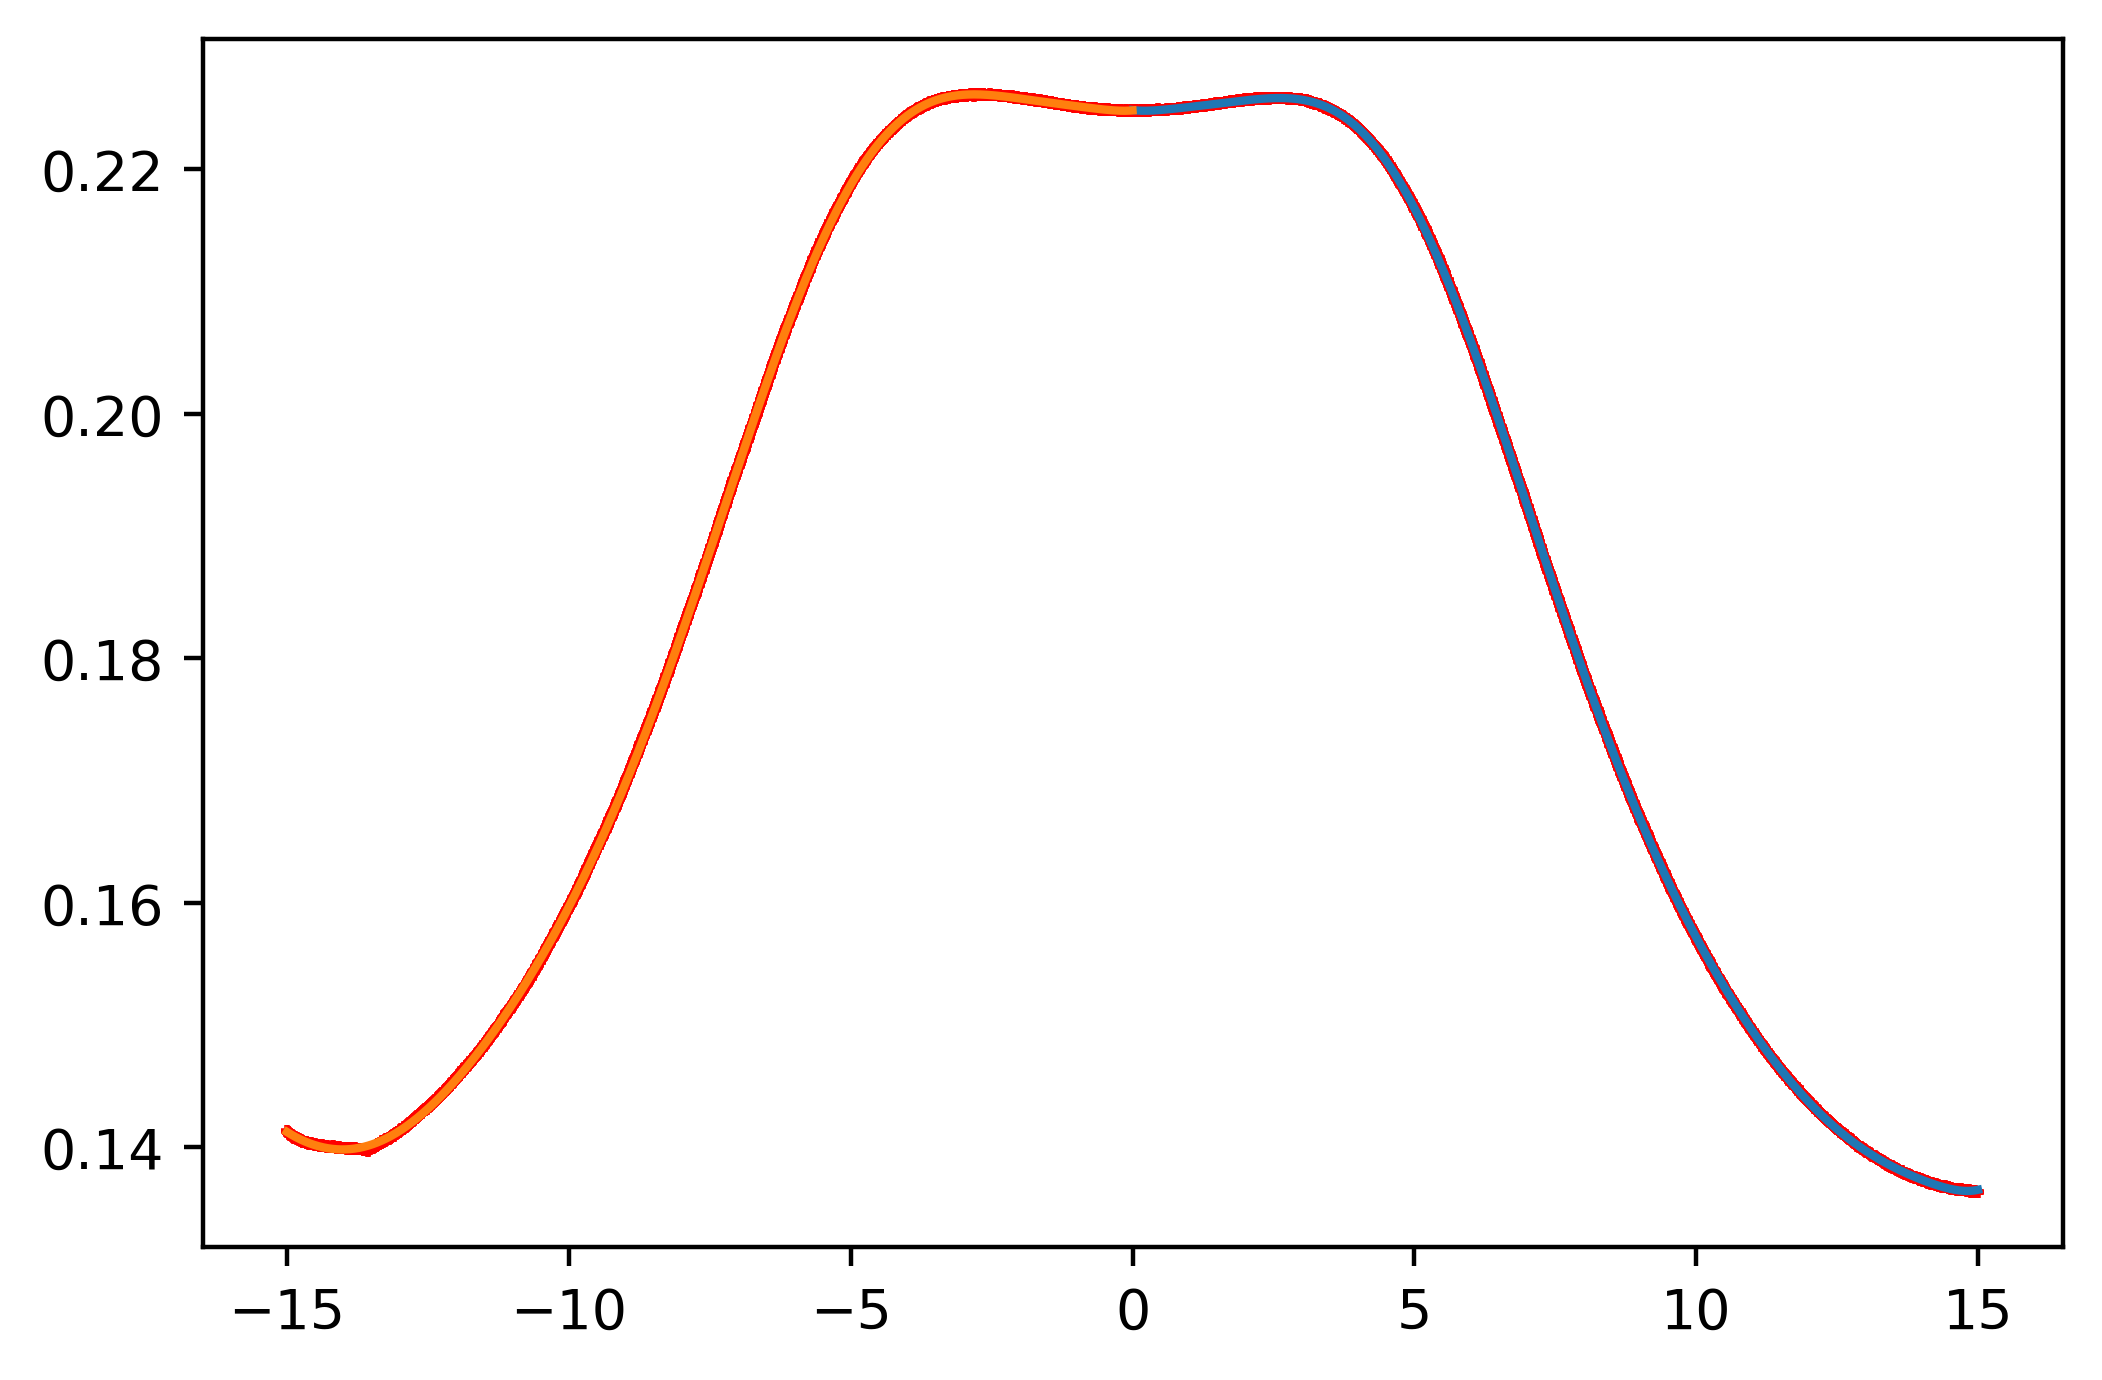

In [47]:
plt.figure(dpi=400)
plt.plot(vp.R, vp.Bmag, 'r+', markersize=2)
plt.plot(vp[vp.R>0].R, bmag_vp_rp(vp[vp.R>0].R))
plt.plot(vp[vp.R<0].R, bmag_vp_rn(vp[vp.R<0].R))
# plt.plot(vn.R, vn.Bmag, 'g+', markersize=2)
# plt.plot(vn[vn.R>0].R, bmag_vn_rp(vn[vn.R>0].R))
# plt.plot(vn[vn.R<0].R, bmag_vn_rn(vn[vn.R<0].R))

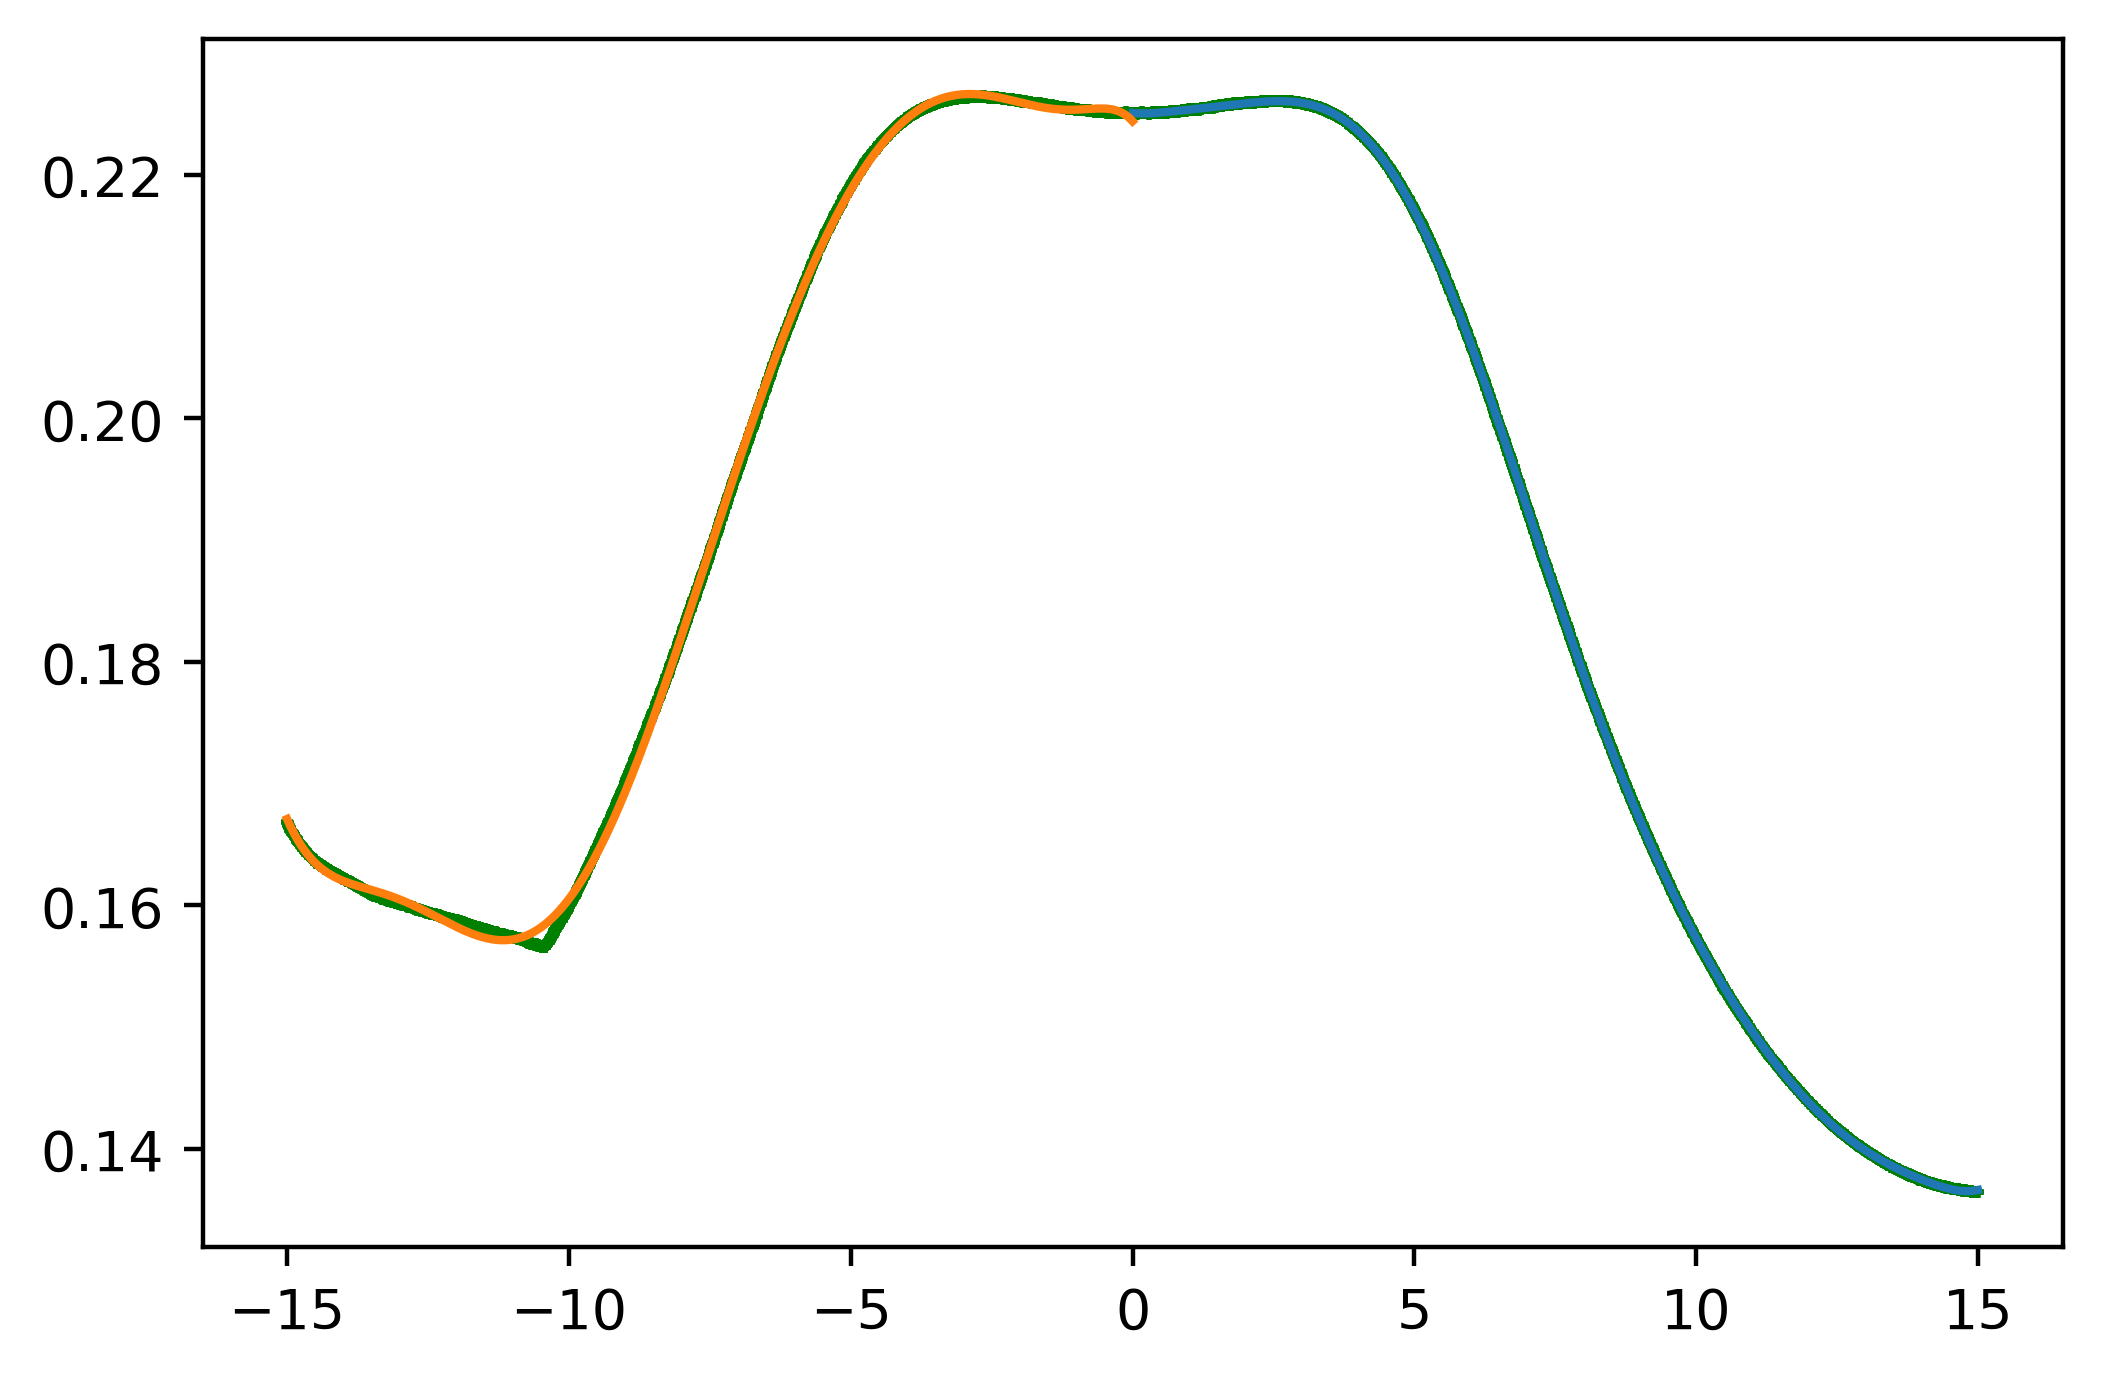

In [48]:
plt.figure(dpi=400)
plt.plot(vn.R, vn.Bmag, 'g+', markersize=2)
plt.plot(vn[vn.R>0].R, bmag_vn_rp(vn[vn.R>0].R))
plt.plot(vn[vn.R<0].R, bmag_vn_rn(vn[vn.R<0].R))

### Voltage Correction function

In [49]:
V0 = 5.0 # Voltage used for radial scan
Rpts_p = np.arange(0, 15, 0.01)
Rpts_n = np.arange(-15, 0, 0.01)

In [50]:
vcent_vp_rp = V0/cen_vp_fit(bmag_vp_rp(Rpts_p))
vcent_vp_rn = V0/cen_vp_fit(bmag_vp_rn(Rpts_n))
vcent_vn_rp = -V0/cen_vn_fit(-bmag_vn_rp(Rpts_p))
vcent_vn_rn = -V0/cen_vn_fit(-bmag_vn_rn(Rpts_n))

In [51]:
n = 10
vcorr_vp_rp_coeff = np.polyfit(Rpts_p, vcent_vp_rp, n)
vcorr_vp_rp = np.poly1d(vcorr_vp_rp_coeff)
vcorr_vp_rn_coeff = np.polyfit(Rpts_n, vcent_vp_rn, n)
vcorr_vp_rn = np.poly1d(vcorr_vp_rn_coeff)
vcorr_vn_rp_coeff = np.polyfit(Rpts_p, vcent_vn_rp, n)
vcorr_vn_rp = np.poly1d(vcorr_vn_rp_coeff)
vcorr_vn_rn_coeff = np.polyfit(Rpts_n, vcent_vn_rn, n)
vcorr_vn_rn = np.poly1d(vcorr_vn_rn_coeff)

In [52]:
print(vcorr_vp_rp_coeff, '\n', vcorr_vp_rn_coeff, '\n', vcorr_vn_rp_coeff, '\n',vcorr_vn_rn_coeff)

[ 1.17806676e-09 -9.25866179e-08  3.07228635e-06 -5.56613273e-05
  5.93598172e-04 -3.74677152e-03  1.36016264e-02 -2.87288971e-02
  3.37515854e-02 -1.44532327e-02 -1.05037432e+00] 
 [ 3.08957105e-10  3.16915906e-08  1.28105182e-06  2.69253228e-05
  3.20022268e-04  2.16468762e-03  8.06986035e-03  1.72261325e-02
  2.08399438e-02  7.51466943e-03 -1.05121660e+00] 
 [ 1.01680808e-09 -7.91399937e-08  2.59889271e-06 -4.65494475e-05
  4.89974766e-04 -3.04404878e-03  1.08267458e-02 -2.23078852e-02
  2.55583241e-02 -1.04648640e-02 -9.59975765e-01] 
 [-2.05729128e-09 -1.60384714e-07 -5.25243985e-06 -9.43731418e-05
 -1.02204988e-03 -6.91131509e-03 -2.89786826e-02 -7.00062190e-02
 -8.62456532e-02 -4.70164266e-02 -9.66949673e-01]


In [27]:
vcorr_coeffs = [vcorr_vp_rp_coeff, vcorr_vn_rp_coeff, vcorr_vp_rn_coeff, vcorr_vn_rn_coeff]
np.savetxt("./icarusCalibCsv/icarus_volt_correction_calib.csv", vcorr_coeffs, delimiter=",")

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

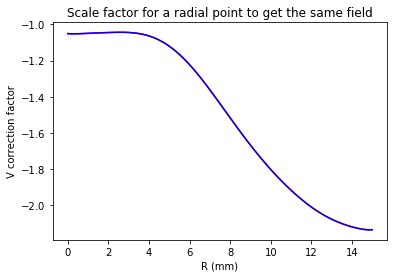

In [53]:
plt.plot(Rpts_p, vcent_vp_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vp_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

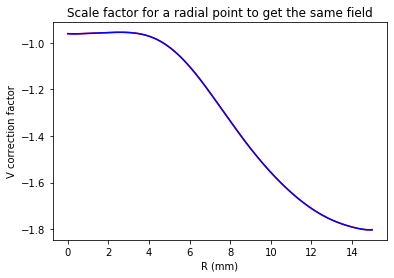

In [54]:
plt.plot(Rpts_p, vcent_vn_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vn_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

### 90 degrees

In [10]:
vp90 = pd.read_csv('./2019-06-28/5vp90_daedalus_radialPolar_calib_A090.0_2019-06-28_1.csv', comment='#')
vn90 = pd.read_csv('./2019-06-28/5vn90_daedalus_radialPolar_calib_A090.0_2019-06-28_1.csv', comment='#')

In [11]:
vp90 = vp90.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vp90 = vp90.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Xfield)*180/np.pi)
vp90 = vp90.assign(Bmag=lambda a: np.sqrt(a.Xfield**2 + a.Zfield**2))

vn90 = vn90.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vn90 = vn90.assign(theta=lambda a: np.arctan2(a.Zfield, a.Xfield)*180/np.pi)
vn90 = vn90.assign(Bmag=lambda a: np.sqrt(a.Xfield**2 + a.Zfield**2))

vp90_dv = {}
vn90_dv = {}
for c in vp90.columns[:]:
    vp90_dv[c] = (["R"],vp90[c])
    vn90_dv[c] = (["R"],vn90[c])
vp90_ds = xr.Dataset(vp90_dv)
vn90_ds = xr.Dataset(vn90_dv)

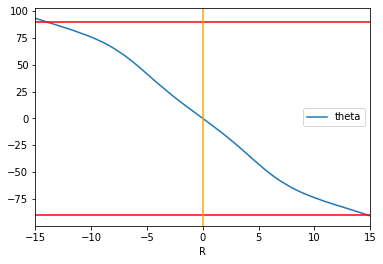

In [12]:
vp90.plot('R', 'theta')
plt.axhline(90,color='r')
plt.axhline(-90,color='r')
plt.axvline(0,color='orange')

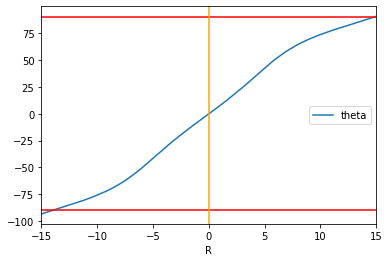

In [13]:
vn90.plot('R', 'theta')
plt.axhline(-90,color='r')
plt.axhline(90, color='r')
plt.axvline(0,color='orange')

In [14]:
vp90_rp = vp90[vp90.R>0]
vp90_rn = vp90[vp90.R<0]
vn90_rp = vn90[vn90.R>0]
vn90_rn = vn90[vn90.R<0]

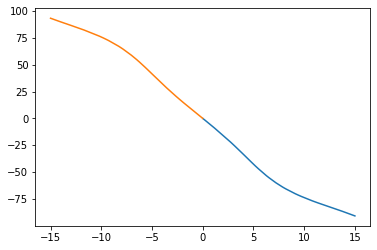

In [15]:
plt.plot(vp90_rp.R, vp90_rp.theta)
plt.plot(vp90_rn.R, vp90_rn.theta)

### Plot pos neg voltage discrepancy

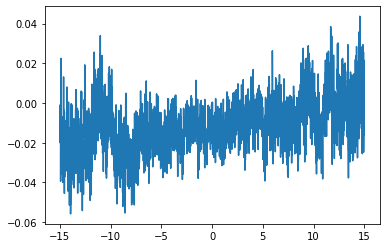

In [16]:
plt.plot(vp90.R, (vp90.theta+vn90.theta))

### Positive voltage R-theta relation

In [17]:
vp90_R_thetapos_coeff = np.polyfit(vp90_rp.theta, vp90_rp.R, 6)
vp90_R_thetaneg_coeff = np.polyfit(vp90_rn.theta, vp90_rn.R, 6)
vp90_R_thetapos = np.poly1d(vp90_R_thetapos_coeff)
vp90_R_thetaneg = np.poly1d(vp90_R_thetaneg_coeff)
R_theta90 = vp90_R_thetapos_coeff,vp90_R_thetaneg_coeff
print(R_theta90)
np.savetxt("./icarusCalibCsv/icarus_radial_polar_calib.csv", R_theta90, delimiter=",")

(array([-2.20038918e-10, -5.33665460e-08, -4.58855053e-06, -1.85556524e-04,
       -3.94442279e-03, -1.60119097e-01, -3.96000666e-02]), array([ 1.50421396e-10, -3.85333747e-08,  3.44453525e-06, -1.41754881e-04,
        3.08195442e-03, -1.56619357e-01,  6.04727391e-02]))


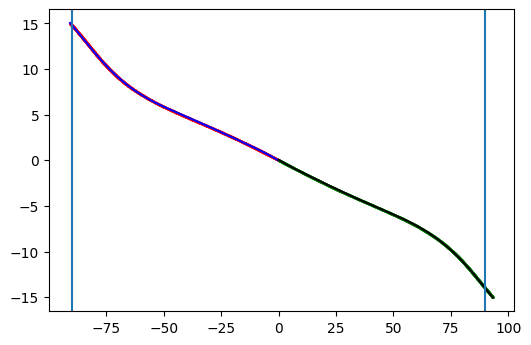

In [18]:
plt.figure(dpi=100)
plt.plot(vp90_rp.theta, vp90_rp.R, 'r+', markersize=2)
plt.plot(vp90_rp.theta, vp90_R_thetapos(vp90_rp.theta), 'b')
plt.plot(vp90_rn.theta, vp90_rn.R, 'g+', markersize=2)
plt.plot(vp90_rn.theta, vp90_R_thetaneg(vp90_rn.theta), 'k')
plt.axvline(90)
plt.axvline(-90)

### Difference between 0 and 90 fit

In [19]:
plt.plot(vp_rp.R, vp_rp.theta-vp90_rp.theta)

NameError: name 'vp_rp' is not defined

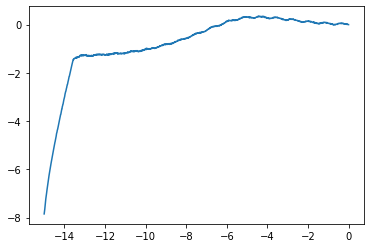

In [51]:
plt.plot(vp_rn.R, vp_rn.theta-vp90_rn.theta)

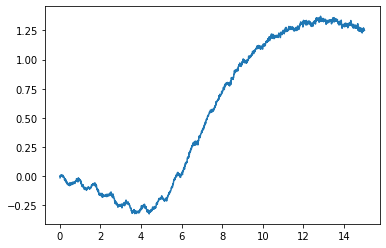

In [50]:
plt.plot(vn_rp.R, vn_rp.theta-vn90_rp.theta)

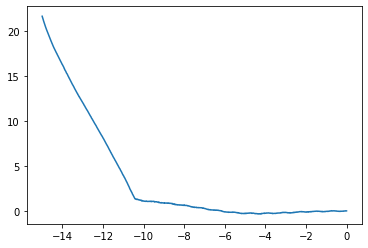

In [52]:
plt.plot(vn_rn.R, vn_rn.theta-vn90_rn.theta)

### Bmag

In [20]:
bmag_vp90_rp_coeff = np.polyfit(vp90[vp90.R>0].R, vp90[vp90.R>0].Bmag, 10)
bmag_vp90_rp = np.poly1d(bmag_vp90_rp_coeff)

bmag_vp90_rn_coeff = np.polyfit(vp90[vp90.R<0].R, vp90[vp90.R<0].Bmag, 10)
bmag_vp90_rn = np.poly1d(bmag_vp90_rn_coeff)

bmag_vn90_rp_coeff = np.polyfit(vn90[vn90.R>0].R, vn90[vn90.R>0].Bmag, 10)
bmag_vn90_rp = np.poly1d(bmag_vn90_rp_coeff)

bmag_vn90_rn_coeff = np.polyfit(vn90[vn90.R<0].R, vn90[vn90.R<0].Bmag, 10)
bmag_vn90_rn = np.poly1d(bmag_vn90_rn_coeff)

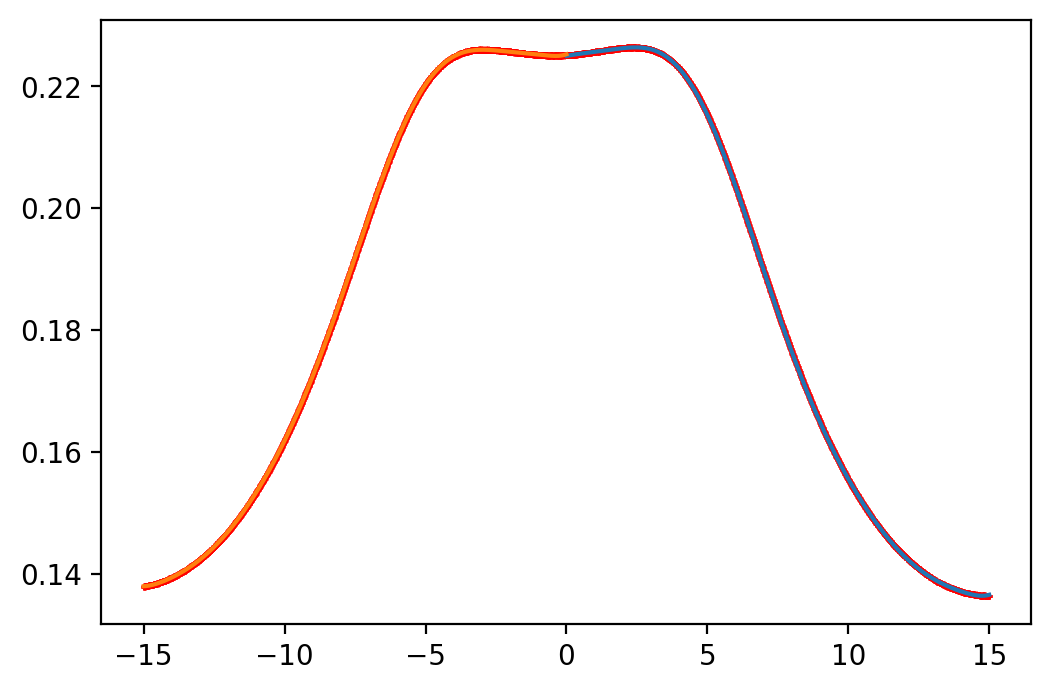

In [21]:
plt.figure(dpi=200)
plt.plot(vp90.R, vp90.Bmag, 'r+', markersize=2)
plt.plot(vp90[vp90.R>0].R, bmag_vp90_rp(vp90[vp90.R>0].R))
plt.plot(vp90[vp90.R<0].R, bmag_vp90_rn(vp90[vp90.R<0].R))

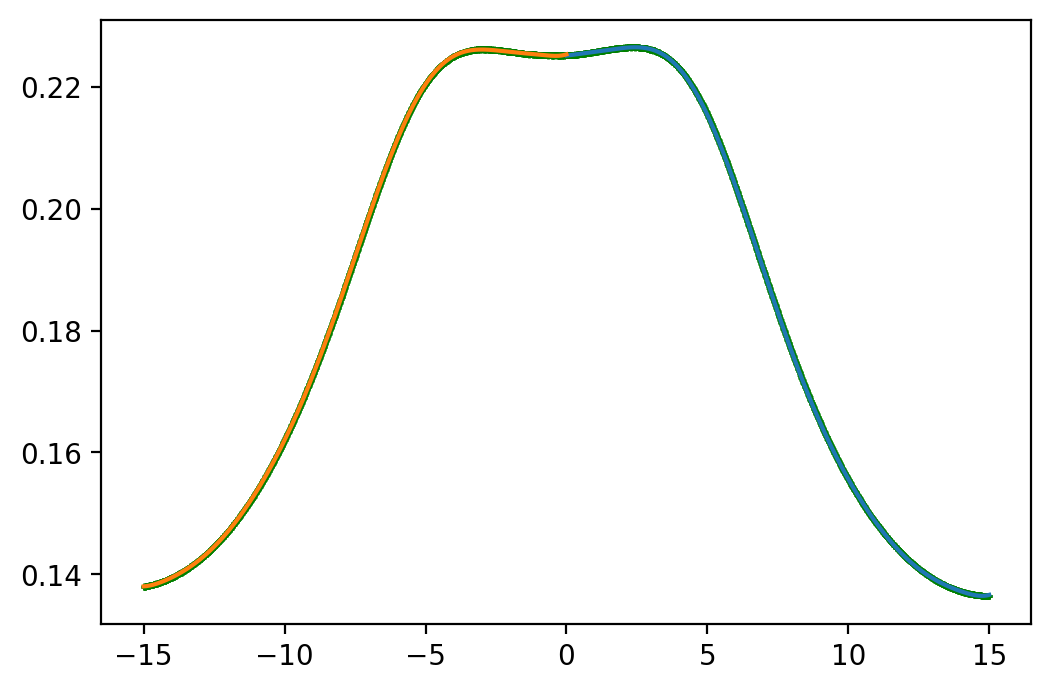

In [22]:
plt.figure(dpi=200)
plt.plot(vn90.R, vn90.Bmag, 'g+', markersize=2)
plt.plot(vn90[vn90.R>0].R, bmag_vn90_rp(vn90[vn90.R>0].R))
plt.plot(vn90[vn90.R<0].R, bmag_vn90_rn(vn90[vn90.R<0].R))

### Voltage Correction function

In [23]:
Rpts_p = np.arange(0, 15, 0.01)
Rpts_n = np.arange(-15, 0, 0.01)
vp0 = cen_vp_fit(bmag_vp90_rp(0.0))
vn0 = cen_vn_fit(-bmag_vn90_rp(0.0))

In [24]:
vcent_vp90_rp = vp0/cen_vp_fit(bmag_vp90_rp(Rpts_p))
vcent_vp90_rn = vp0/cen_vp_fit(bmag_vp90_rn(Rpts_n))
vcent_vn90_rp = vn0/cen_vn_fit(-bmag_vn90_rp(Rpts_p))
vcent_vn90_rn = vn0/cen_vn_fit(-bmag_vn90_rn(Rpts_n))

In [25]:
print(vcent_vp90_rp, vcent_vp90_rn, vcent_vn90_rp, vcent_vn90_rn)

[1.         0.99993803 0.99987612 ... 2.03154232 2.03132514 2.03109571] [2.00692938 2.00690115 2.00686566 ... 0.99830307 0.99817684 0.9980449 ] [1.         0.99996632 0.99993194 ... 1.87734975 1.87717194 1.87698404] [1.85800758 1.857975   1.85793688 ... 0.99888634 0.9987806  0.99867004]


In [26]:
n = 10
vcorr_vp90_rp_coeff = np.polyfit(Rpts_p, vcent_vp90_rp, n)
vcorr_vp90_rp = np.poly1d(vcorr_vp90_rp_coeff)
vcorr_vp90_rn_coeff = np.polyfit(Rpts_n, vcent_vp90_rn, n)
vcorr_vp90_rn = np.poly1d(vcorr_vp90_rn_coeff)
vcorr_vn90_rp_coeff = np.polyfit(Rpts_p, vcent_vn90_rp, n)
vcorr_vn90_rp = np.poly1d(vcorr_vn90_rp_coeff)
vcorr_vn90_rn_coeff = np.polyfit(Rpts_n, vcent_vn90_rn, n)
vcorr_vn90_rn = np.poly1d(vcorr_vn90_rn_coeff)

In [27]:
vcorr_vp90_rp_coeff

array([-1.17150734e-09,  8.97456206e-08, -2.89251614e-06,  5.06400015e-05,
       -5.17674838e-04,  3.08978370e-03, -1.03854020e-02,  2.02024078e-02,
       -2.14071345e-02,  4.96143713e-03,  9.98643852e-01])

In [28]:
print(vcorr_vp90_rp_coeff, '\n', vcorr_vp90_rn_coeff, '\n', vcorr_vn90_rp_coeff, '\n',vcorr_vn90_rn_coeff)

[-1.17150734e-09  8.97456206e-08 -2.89251614e-06  5.06400015e-05
 -5.17674838e-04  3.08978370e-03 -1.03854020e-02  2.02024078e-02
 -2.14071345e-02  4.96143713e-03  9.98643852e-01] 
 [-6.77649437e-10 -5.72949690e-08 -2.04573408e-06 -3.99005063e-05
 -4.58495732e-04 -3.12157984e-03 -1.22067333e-02 -2.73158142e-02
 -3.37350826e-02 -1.68267768e-02  9.97471019e-01] 
 [-1.06114123e-09  8.09886387e-08 -2.59938367e-06  4.52894527e-05
 -4.60397276e-04  2.73125865e-03 -9.14158306e-03  1.78872937e-02
 -1.94069823e-02  4.83206593e-03  9.99006060e-01] 
 [-6.57860884e-10 -5.47672978e-08 -1.92500493e-06 -3.69372752e-05
 -4.17024151e-04 -2.78275310e-03 -1.06206967e-02 -2.31276023e-02
 -2.80094797e-02 -1.37856584e-02  9.98238055e-01]


In [29]:
vcorr_coeffs = [vcorr_vp90_rp_coeff, vcorr_vn90_rp_coeff, vcorr_vp90_rn_coeff, vcorr_vn90_rn_coeff]
np.savetxt("./icarusCalibCsv/icarus_volt_correction_calib.csv", vcorr_coeffs, delimiter=",")

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

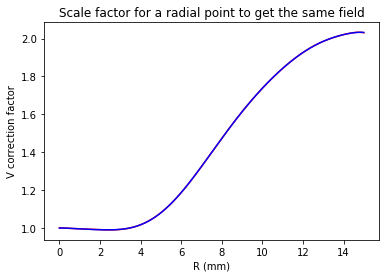

In [30]:
plt.plot(Rpts_p, vcent_vp90_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vp90_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

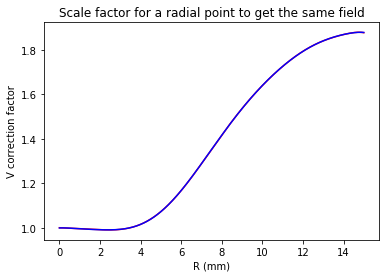

In [31]:
plt.plot(Rpts_p, vcent_vn90_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vn90_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

In [60]:
np.arctan2(0.14, 0.006)*180/np.pi

87.54596832547293